## Data Import

In [2]:
import pandas as pd

df = pd.read_csv("BankChurners v3.csv")

In [3]:
df = df.drop(df.columns[0], axis = 1)

In [4]:
X = df.drop(df.columns[0], axis=1)
X.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,56.0,F,4.0,Uneducated,Single,3.6,Blue,51.0,5.0,1.0,1.0,3334.0,1272.0,2062.0,1.120,4284.0,73.0,0.587,0.382
1,44.0,M,3.0,Graduate,Single,$60K - $80K,Blue,37.0,5.0,2.0,3.0,1682.0,930.0,752.0,0.903,3309.0,67.0,1.030,0.553
2,53.0,M,4.0,High School,Divorced,$120K +,Blue,36.0,3.0,3.0,2.0,34516.0,1337.0,33179.0,0.704,7919.0,85.0,0.635,0.039
3,53.0,M,3.0,2.4,Married,$80K - $120K,Blue,40.0,2.0,2.0,3.0,16747.0,0.0,16747.0,0.801,4350.0,76.0,0.767,0.000
4,40.0,M,3.0,Uneducated,Married,$80K - $120K,Blue,29.0,3.0,2.0,3.0,3616.0,1151.0,2465.0,0.687,820.0,21.0,0.750,0.318


In [5]:
Y = df[df.columns[0]].astype('int')
Y[:3]

0    1
1    1
2    1
Name: Attrition_Flag, dtype: int64

### Check the Outliers with DBSCAN algorithm

In [6]:
print(X.shape)
np.unique(X.dtypes)

(3254, 19)


array([dtype('float64'), dtype('O')], dtype=object)

In [7]:
X_float = X.select_dtypes(np.unique(X.dtypes)[0])
X_float.shape

(3254, 14)

In [8]:
X_str = X.select_dtypes(np.unique(X.dtypes)[1])
X_str.shape


(3254, 5)

In [9]:
from scipy.spatial.distance import cdist
from sklearn.cluster import DBSCAN

DM = cdist(X_float, X_float)
np.quantile(DM, 0.06)

1760.0477565060555

In [10]:
cluster_model = DBSCAN(eps = 1760, min_samples = 5).fit(X_float)
print(sum(cluster_model.labels_ == -1)) 

48


In [11]:
X = X[cluster_model.labels_ != -1]
Y = Y[cluster_model.labels_ != -1]
X_float = X.select_dtypes(np.unique(X.dtypes)[0])
X_str = X.select_dtypes(np.unique(X.dtypes)[1])


X_float.shape, X_str.shape

((3206, 14), (3206, 5))

## Standardization

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_float)
X_float = pd.DataFrame(scaler.transform(X_float), columns=X_float.columns)
X_float.shape

(3206, 14)

## Categorical Data

In [13]:
for col in X_str.columns:
    print(col, len(X_str[col].unique()))

Gender 2
Education_Level 21
Marital_Status 11
Income_Category 19
Card_Category 4


In [14]:
# !pip3 install feature-engine

In [15]:
from feature_engine.encoding import OneHotEncoder as OHE

dummy_model = OHE(variables = X_str.columns.tolist(),
                 drop_last = True)
dummy_model.fit(X_str)
X_dummy = dummy_model.transform(X_str)

In [16]:
X_dummy.reset_index(inplace=True)

In [17]:
X_dummy = X_dummy.drop(X_dummy.columns[0], axis=1)

In [18]:
X = pd.concat([X_float, X_dummy], axis=1)

In [18]:
X.shape

(3206, 66)

In [19]:
X.isnull().sum(axis = 0)

Customer_Age                0
Dependent_count             0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
                           ..
Income_Category_4.6         0
Income_Category_1.4         0
Card_Category_Blue          0
Card_Category_Silver        0
Card_Category_Gold          0
Length: 66, dtype: int64

In [20]:
X.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Income_Category_4.4,Income_Category_3.8,Income_Category_3.2,Income_Category_1.8,Income_Category_2.8,Income_Category_4.6,Income_Category_1.4,Card_Category_Blue,Card_Category_Silver,Card_Category_Gold
0,1.194566,1.284221,1.869805,0.876109,-1.517670,-1.454375,-0.555089,0.338850,-0.588161,1.733819,...,0,0,0,0,0,0,0,1,0,0
1,-0.330483,0.503263,0.109795,0.876109,-0.492459,0.310138,-0.739584,-0.043223,-0.734263,0.766232,...,0,0,0,0,0,0,0,1,0,0
2,0.813304,1.284221,-0.015920,-0.385425,0.532751,-0.572118,2.927305,0.411467,2.882246,-0.121093,...,0,0,0,0,0,0,0,1,0,0
3,0.813304,0.503263,0.486940,-1.016192,-0.492459,0.310138,0.942870,-1.082194,1.049623,0.311422,...,0,0,0,0,0,0,0,1,0,0
4,-0.838832,0.503263,-0.895925,-0.385425,-0.492459,0.310138,-0.523595,0.203673,-0.543216,-0.196895,...,0,0,0,0,0,0,0,1,0,0


## 1. Logistic Regression

In [390]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X.values, Y.values, test_size=0.3, random_state=1234)

In [391]:
from sklearn.linear_model import LogisticRegression 

model= LogisticRegression(C=0.1, solver= 'lbfgs', max_iter=5000).fit(X_train, Y_train)

In [392]:
print('Train Accuracy : ', model.score(X_train, Y_train))
print('Test Accuracy : ',model.score(X_test, Y_test))

Train Accuracy :  0.8591800356506238
Test Accuracy :  0.843035343035343


In [215]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, X_train, Y_train, scoring="accuracy", cv=5).mean()

0.8288866131084951

### Hyperparameter Tuning

In [408]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

model = LogisticRegression(random_state=30,
            solver='lbfgs'
          )

param_grid = {
    'max_iter': np.linspace(500, 5000, 10),
    'C': np.linspace(0, 2, 20),
}
grid_reg = GridSearchCV(model, param_grid=param_grid,
                         cv=5, refit=True, return_train_score=True)

grid_reg.fit(X_train, Y_train)
scores_df = pd.DataFrame(grid_reg.cv_results_)

/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:760: RuntimeWarning: divide by zero encountered in double_scalars
  args=(X, target, 1. / C, sample_weight),
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:123: RuntimeWarning: invalid value encountered in double_scalars
  out = -np.sum(sample_weight * log_logistic(yz)) + .5 * alpha * np.dot(w, w)
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:128: RuntimeWarning: invalid value encountered in multiply
  grad[:n_features] = safe_sparse_dot(X.T, z0) + alpha * w
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packa

/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.85205914 0.85205914
 0.85205914 0.85205914 0.85205914 0.85205914 0.85205914 0.85205914
 0.85205914 0.85205914 0.85295001 0.85295001 0.85295001 0.85295001
 0.85295001 0.85295001 0.85295001 0.85295001 0.85295001 0.85295001
 0.84983197 0.84983197 0.84983197 0.84983197 0.84983197 0.84983197
 0.84983197 0.84983197 0.84983197 0.84983197 0.84804924 0.84804924
 0.84804924 0.84804924 0.84804924 0.84804924 0.84804924 0.84804924
 0.84804924 0.84804924 0.84715936 0.84715936 0.84715936 0.84715936
 0.84715936 0.84715936 0.84715936 0.84715936 0.84715936 0.84715936
 0.84715936 0.84715936 0.84715936 0.84715936 0.84715936 0.84715936
 0.84715936 0.84715936 0.84715936 0.84715936 0.84582206 0.84582206
 0.84582206 0.84582206 0.84582206

In [411]:
grid_reg.best_estimator_

LogisticRegression(C=0.21052631578947367, max_iter=500.0, random_state=30)

In [412]:
from sklearn.linear_model import LogisticRegression 

model= LogisticRegression(C=0.210526, solver= 'lbfgs', max_iter=5000).fit(X_train, Y_train)
cross_val_score(model, X_train, Y_train, scoring="accuracy", cv=5).mean()

0.8529500079541839

In [415]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


y_pred = model.predict(X_test)

confusion_matrix(Y_test, y_pred)

array([[403,  75],
       [ 77, 407]])

In [416]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       478
           1       0.84      0.84      0.84       484

    accuracy                           0.84       962
   macro avg       0.84      0.84      0.84       962
weighted avg       0.84      0.84      0.84       962



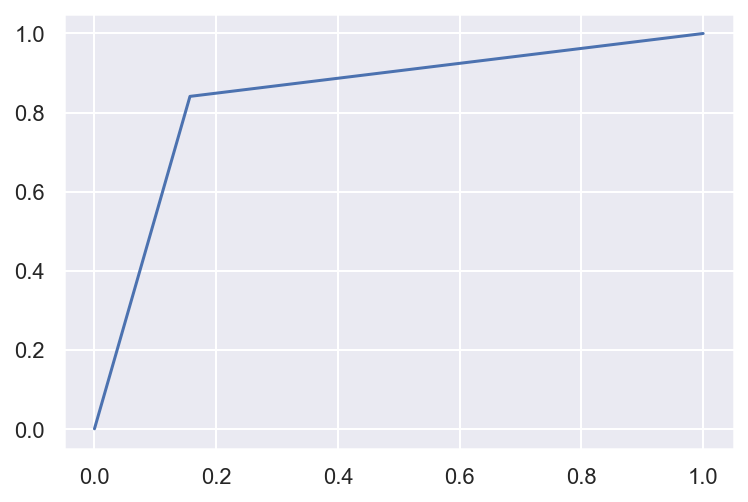

In [417]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
plt.plot(fpr, tpr)
plt.show()

### Lasso Regression

In [476]:
import pandas as pd

df = pd.read_csv("BankChurners v3.csv")

In [482]:
X_lasso = df.drop(df.columns[0], axis=1)
X_str = X_lasso.select_dtypes(np.unique(X_lasso.dtypes)[1])
X_float = X_lasso.select_dtypes(np.unique(X_lasso.dtypes)[0])

In [484]:
X_lasso.shape, X_str.shape, X_float.shape

((3254, 20), (3254, 5), (3254, 15))

In [485]:
from feature_engine.encoding import OneHotEncoder as OHE

dummy_model = OHE(variables = X_str.columns.tolist(),
                 drop_last = True)
dummy_model.fit(X_str)
X_dummy = dummy_model.transform(X_str)
X_dummy.reset_index(inplace=True)

X_lasso = pd.concat([X_float, X_dummy], axis=1)

In [486]:
X_lasso.shape

(3254, 68)

In [492]:
Y_lasso = X_lasso[X_lasso.columns[0]].astype('int')
X_lasso = X_lasso.drop(X_lasso.columns[0], axis=1)
X_lasso.head()

,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,...,Income_Category_4.4,Income_Category_3.8,Income_Category_3.2,Income_Category_1.8,Income_Category_2.8,Income_Category_4.6,Income_Category_1.4,Card_Category_Blue,Card_Category_Silver,Card_Category_Gold
0,4.0,51.0,5.0,1.0,1.0,3334.0,1272.0,2062.0,1.120,4284.0,...,0,0,0,0,0,0,0,1,0,0
1,3.0,37.0,5.0,2.0,3.0,1682.0,930.0,752.0,0.903,3309.0,...,0,0,0,0,0,0,0,1,0,0
2,4.0,36.0,3.0,3.0,2.0,34516.0,1337.0,33179.0,0.704,7919.0,...,0,0,0,0,0,0,0,1,0,0
3,3.0,40.0,2.0,2.0,3.0,16747.0,0.0,16747.0,0.801,4350.0,...,0,0,0,0,0,0,0,1,0,0
4,3.0,29.0,3.0,2.0,3.0,3616.0,1151.0,2465.0,0.687,820.0,...,0,0,0,0,0,0,0,1,0,0


In [504]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_lasso.values, Y_lasso.values, test_size=0.3, random_state=1234)

In [505]:
# Loss function
def MSE(real, predict):
    return ((real-predict)**2).mean()

In [516]:
from sklearn.linear_model import Lasso

lasso1 = Lasso(alpha=0.09, max_iter=5000, normalize=True)

lasso1.fit(X_train, Y_train)
lasso1_pred = lasso1.predict(X_test)

In [517]:
print("Training score:{:0.2f}".format(lasso1.score(X_train, Y_train)))
print("Test score:{:0.2f}".format(lasso1.score(X_test, Y_test)))
print("Mean squared error:{:0.2f}".format(MSE(Y_test, lasso1_pred)))

print("Features:", np.sum(lasso1.coef_ != 0)) 

Training score:0.30
Test score:0.30
Mean squared error:44.59
Features: 1


In [532]:
alpha = np.linspace(0, 0.5, 1000)

In [533]:
train_score = []
test_score = []

for i in alpha:
    lasso = Lasso(alpha=i, normalize=True)
    lasso.fit(X_train,Y_train)
    
    lasso_train_score = lasso.score(X_train, Y_train)
    lasso_test_score = lasso.score(X_test, Y_test)

    train_score.append(lasso_train_score)
    test_score.append(lasso_test_score)

<ipython-input-533-eaa2fc34c71f>:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X_train,Y_train)
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26822.49485768472, tolerance: 13.988266490996926
  model = cd_fast.enet_coordinate_descent(


In [534]:
max(train_score), max(test_score)

(0.6165000877707308, 0.616071526273362)

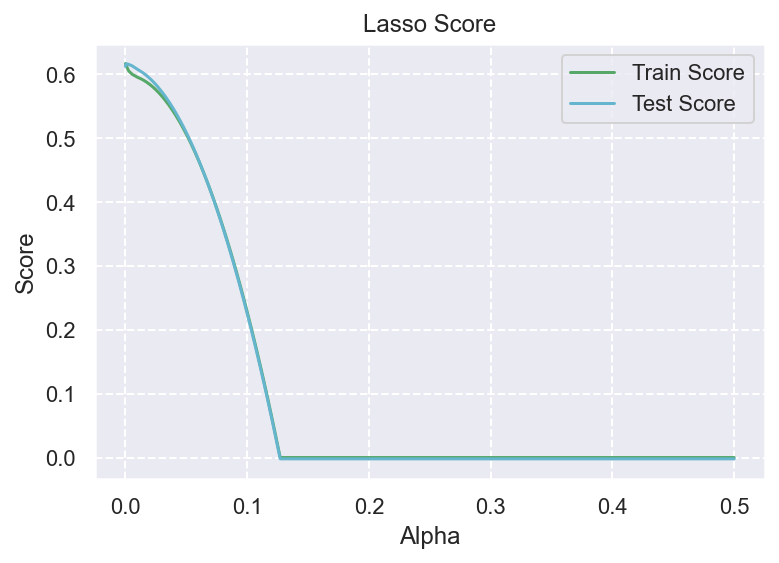

In [535]:
plt.grid(linestyle='--')

plt.plot(alpha,train_score, color="g", label="Train Score")
plt.plot(alpha,test_score, color="c", label="Test Score")

plt.title("Lasso Score")
plt.legend(loc='best')

plt.xlabel("Alpha")
plt.ylabel("Score")

plt.show()

It shows too low scores, let's use another model. 

## 2. Support Vector Machine

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X.values, Y.values, test_size=0.3, random_state=1234)

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

model = SVC(kernel="poly").fit(X_train, Y_train)

param_grid = {
    'degree': [2, 3, 4], 
    'gamma': np.linspace(0, 1, 20),
    'C': np.linspace(0.5, 5, 5),3
}
grid_reg = GridSearchCV(model, param_grid=param_grid,
                         cv=5, refit=True, return_train_score=True)

grid_reg.fit(X_train, Y_train)
scores_df = pd.DataFrame(grid_reg.cv_results_)

KeyboardInterrupt: 

In [46]:
from sklearn.svm import SVC
model1 = SVC(kernel="poly", degree=3, gamma=0.07).fit(X_train , Y_train)

from sklearn.metrics import classification_report
print(classification_report(Y_test, model1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       478
           1       0.88      0.92      0.90       484

    accuracy                           0.89       962
   macro avg       0.89      0.89      0.89       962
weighted avg       0.89      0.89      0.89       962



In [59]:
from sklearn.svm import SVC
model1 = SVC(kernel="rbf", gamma=0.1, C=3).fit(X_train , Y_train)

from sklearn.metrics import classification_report
print(classification_report(Y_test, model1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       478
           1       0.90      0.92      0.91       484

    accuracy                           0.91       962
   macro avg       0.91      0.91      0.91       962
weighted avg       0.91      0.91      0.91       962



In [66]:
from sklearn.svm import SVC
model1 = SVC(kernel="sigmoid", gamma=0.01, C=1).fit(X_train , Y_train)

from sklearn.metrics import classification_report
print(classification_report(Y_test, model1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       478
           1       0.85      0.84      0.84       484

    accuracy                           0.84       962
   macro avg       0.84      0.84      0.84       962
weighted avg       0.84      0.84      0.84       962



## 3. Neural Net

In [68]:
from tensorflow import keras
keras.__version__

'2.6.0'

In [69]:
X_train.shape

(2244, 66)

In [264]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout
#from tensorflow.keras.optimizers import SGD



model3 = Sequential()
model3.add(Dense(5, input_dim=66, activation="relu"))
model3.add(Dropout(0.2, input_shape = (10,)))
model3.add(Dense(5, activation="relu"))
#model3.add(Dropout(0.2, input_shape = (15,)))

model3.compile(optimizer='adam', loss='mean_squared_error', metrics=["accuracy"])

In [269]:
%%time
hist = model3.fit(X_train, Y_train,
                 epochs=10, batch_size=100,
                 validation_data=(X_test, Y_test),
                 verbose=2)

Epoch 1/10
23/23 - 0s - loss: 0.1804 - accuracy: 0.2295 - val_loss: 0.1573 - val_accuracy: 0.2349
Epoch 2/10
23/23 - 0s - loss: 0.1731 - accuracy: 0.2393 - val_loss: 0.1514 - val_accuracy: 0.2443
Epoch 3/10
23/23 - 0s - loss: 0.1708 - accuracy: 0.2331 - val_loss: 0.1473 - val_accuracy: 0.2453
Epoch 4/10
23/23 - 0s - loss: 0.1675 - accuracy: 0.2411 - val_loss: 0.1438 - val_accuracy: 0.2547
Epoch 5/10
23/23 - 0s - loss: 0.1615 - accuracy: 0.2491 - val_loss: 0.1413 - val_accuracy: 0.2505
Epoch 6/10
23/23 - 0s - loss: 0.1584 - accuracy: 0.2380 - val_loss: 0.1384 - val_accuracy: 0.2484
Epoch 7/10
23/23 - 0s - loss: 0.1547 - accuracy: 0.2348 - val_loss: 0.1364 - val_accuracy: 0.2484
Epoch 8/10
23/23 - 0s - loss: 0.1544 - accuracy: 0.2598 - val_loss: 0.1347 - val_accuracy: 0.2464
Epoch 9/10
23/23 - 0s - loss: 0.1507 - accuracy: 0.2317 - val_loss: 0.1329 - val_accuracy: 0.2412
Epoch 10/10
23/23 - 0s - loss: 0.1489 - accuracy: 0.2380 - val_loss: 0.1311 - val_accuracy: 0.2360
CPU times: user 772

In [270]:
model3.summary()

Model: "sequential_77"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_176 (Dense)            (None, 5)                 335       
_________________________________________________________________
dropout_90 (Dropout)         (None, 5)                 0         
_________________________________________________________________
dense_177 (Dense)            (None, 5)                 30        
Total params: 365
Trainable params: 365
Non-trainable params: 0
_________________________________________________________________


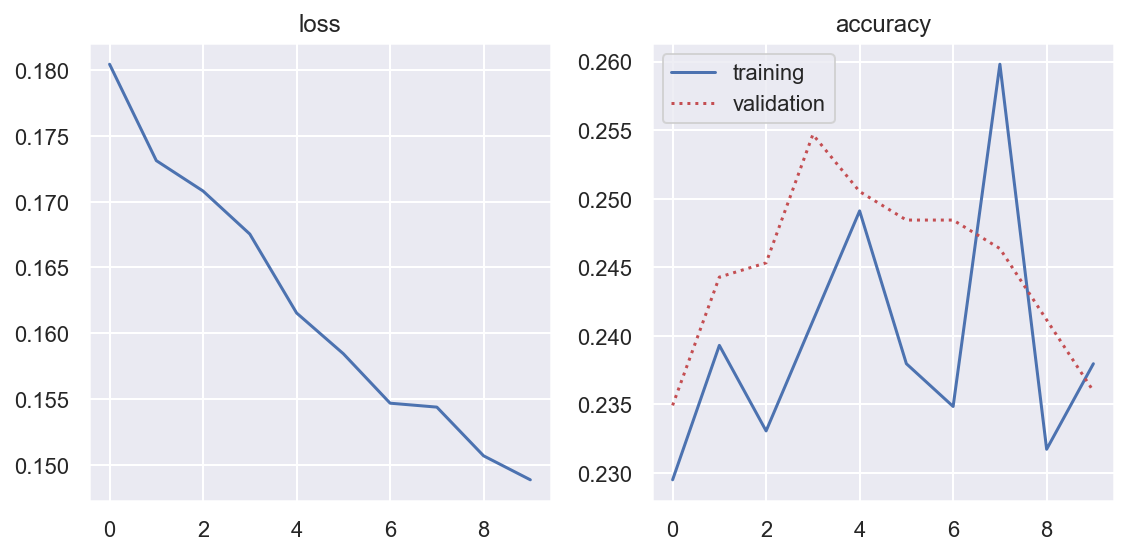

In [271]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'])
plt.title("loss")
plt.subplot(1, 2, 2)
plt.title("accuracy")
plt.plot(hist.history['accuracy'], 'b-', label="training")
plt.plot(hist.history['val_accuracy'], 'r:', label="validation")
plt.legend()
plt.tight_layout()
plt.show()


## 4. Perceptron

Deep Neural Net seems not working well, maybe because of too many parameters with less data. Also, for tuning the parameters, my local mac has not enough. So I tried to perceptron instead. 

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X.values, Y.values, test_size=0.3, random_state=1234)

In [21]:
from sklearn.linear_model import SGDClassifier

In [291]:
model = SGDClassifier(loss='hinge',  penalty='l2',alpha=0.01, max_iter=5000, shuffle=False, n_iter_no_change=1e9).fit(X_train, Y_train)

/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


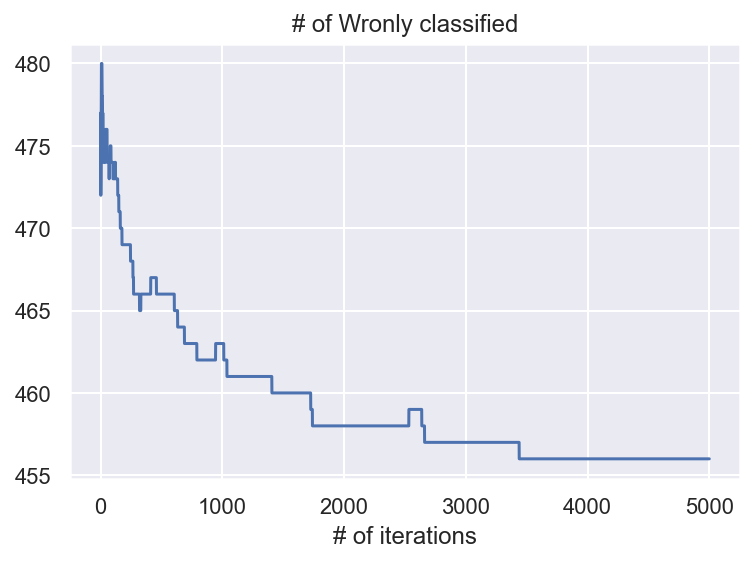

In [36]:
n=5000
loss=np.empty(n)
model = SGDClassifier(loss='log',  penalty='l2',alpha=1, shuffle=False)
for i in range(n):
    model.partial_fit(X_train, Y_train, classes=[0, 1])
    loss[i]=np.sum(Y_train != model.predict(X_train))

plt.plot(loss)
plt.xlabel('# of iterations')
plt.title('# of Wronly classified')
plt.show()

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


y_pred = model.predict(X_test)
confusion_matrix(Y_test, y_pred)

array([[384,  94],
       [107, 377]])

In [38]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       478
           1       0.80      0.78      0.79       484

    accuracy                           0.79       962
   macro avg       0.79      0.79      0.79       962
weighted avg       0.79      0.79      0.79       962



In [52]:
model2 = SGDClassifier(loss='perceptron',  penalty='l2',alpha=0.01, max_iter=5000).fit(X_train, Y_train)

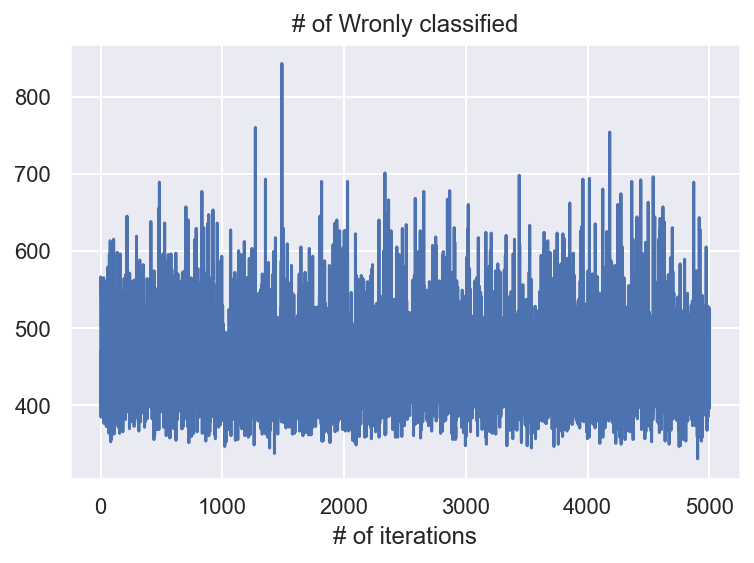

In [49]:
n=5000
loss=np.empty(n)
model2 = SGDClassifier(loss='perceptron',  penalty='l2',alpha=0.01)
for i in range(n):
    model.partial_fit(X_train, Y_train, classes=[0, 1])
    loss[i]=np.sum(Y_train != model.predict(X_train))

plt.plot(loss)
plt.xlabel('# of iterations')
plt.title('# of Wronly classified')
plt.show()

In [53]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


y_pred = model2.predict(X_test)
confusion_matrix(Y_test, y_pred)

array([[365, 113],
       [ 85, 399]])

In [54]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.76      0.79       478
           1       0.78      0.82      0.80       484

    accuracy                           0.79       962
   macro avg       0.80      0.79      0.79       962
weighted avg       0.80      0.79      0.79       962

